In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor , plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,root_mean_squared_error, accuracy_score,mean_absolute_error , r2_score , precision_score , recall_score,f1_score

In [154]:
df=pd.read_csv("gym_members_exercise_tracking.csv")

In [155]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [157]:
df.shape

(973, 15)

In [158]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


Text(0, 0.5, '')

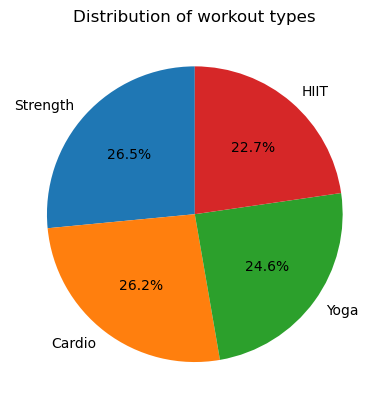

In [159]:
work_out=df["Workout_Type"].value_counts()
work_out.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of workout types')
plt.ylabel("")



Text(0, 0.5, '')

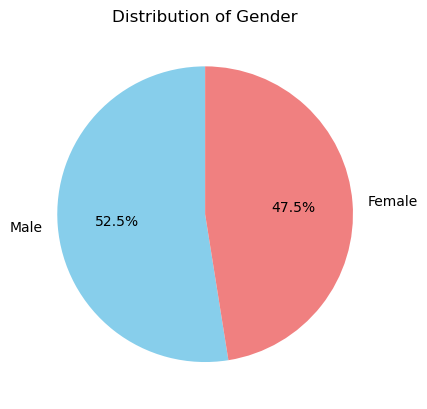

In [160]:
gender=df["Gender"].value_counts()
gender.plot.pie(autopct='%1.1f%%', startangle=90,colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Gender')
plt.ylabel("")


<BarContainer object of 973 artists>

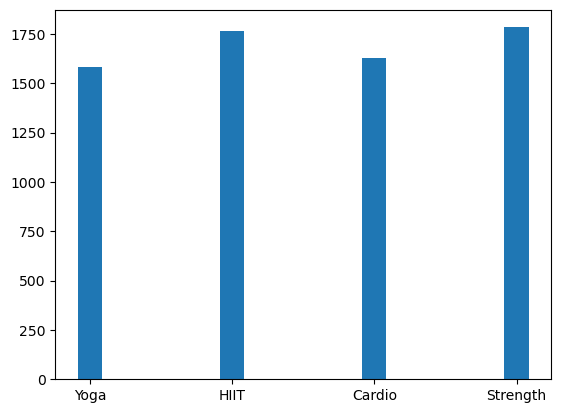

In [161]:
plt.bar(df["Workout_Type"],df["Calories_Burned"],width=0.17)

<BarContainer object of 973 artists>

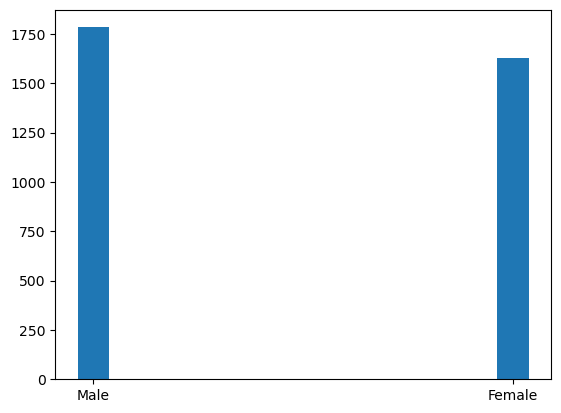

In [162]:
plt.bar(df["Gender"],df["Calories_Burned"],width=.075)

<Axes: xlabel='Calories_Burned', ylabel='Count'>

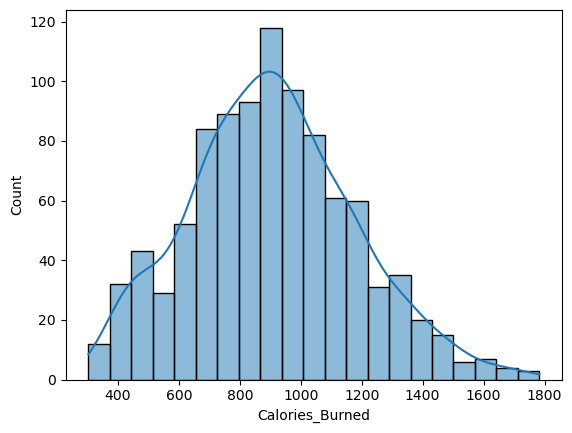

In [163]:
sns.histplot(df["Calories_Burned"],kde=True)

In [164]:
df_encoded=pd.get_dummies(df, columns=["Gender","Workout_Type"])

In [165]:
df_encoded


,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Female,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,False,True,False,False,False,True
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,True,False,False,True,False,False
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,True,False,True,False,False,False
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,False,True,False,False,True,False
4,38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,87.1,1.74,187,158,67,1.57,1364.0,10.0,3.5,4,3,28.77,False,True,False,False,True,False
969,25,66.6,1.61,184,166,56,1.38,1260.0,25.0,3.0,2,1,25.69,False,True,False,False,True,False
970,59,60.4,1.76,194,120,53,1.72,929.0,18.8,2.7,5,3,19.50,True,False,True,False,False,False
971,32,126.4,1.83,198,146,62,1.10,883.0,28.2,2.1,3,2,37.74,False,True,False,True,False,False


In [166]:
df_corr=df_encoded
df_corr.corr()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Female,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
Age,1.000000,-0.036340,-0.027837,-0.017073,0.035969,0.004354,-0.019912,-0.154679,0.002370,0.041528,0.008055,-0.018676,-0.013691,-0.027175,0.027175,-0.049580,0.011677,0.013132,0.025819
Weight (kg),-0.036340,1.000000,0.365321,0.057061,0.009717,-0.032138,-0.013666,0.095443,-0.225512,0.394276,-0.011769,0.003379,0.853158,-0.579340,0.579340,0.027736,0.019779,-0.047244,0.000860
Height (m),-0.027837,0.365321,1.000000,-0.017660,-0.014776,-0.005090,-0.010206,0.086348,-0.235521,0.393533,-0.011270,-0.010267,-0.159469,-0.583503,0.583503,-0.014240,-0.013645,-0.027642,0.056175
Max_BPM,-0.017073,0.057061,-0.017660,1.000000,-0.039751,0.036647,0.010051,0.002090,-0.009056,0.031621,-0.029099,0.000545,0.067105,-0.010245,0.010245,-0.000484,0.010789,-0.044674,0.035805
Avg_BPM,0.035969,0.009717,-0.014776,-0.039751,1.000000,0.059636,0.016014,0.339659,-0.007302,-0.002911,-0.010681,-0.000888,0.021605,-0.009648,0.009648,0.005133,-0.009143,0.022928,-0.019856
Resting_BPM,0.004354,-0.032138,-0.005090,0.036647,0.059636,1.000000,-0.016649,0.016518,-0.016834,0.007726,-0.007967,0.001758,-0.032543,-0.014062,0.014062,-0.019106,0.034404,0.019858,-0.034331
Session_Duration (hours),-0.019912,-0.013666,-0.010206,0.010051,0.016014,-0.016649,1.000000,0.908140,-0.581520,0.283411,0.644140,0.764768,-0.006493,0.012200,-0.012200,-0.063174,0.048439,0.006538,0.010688
Calories_Burned,-0.154679,0.095443,0.086348,0.002090,0.339659,0.016518,0.908140,1.000000,-0.597615,0.356931,0.576150,0.694129,0.059761,-0.150646,0.150646,-0.045726,0.040550,0.011629,-0.004678
Fat_Percentage,0.002370,-0.225512,-0.235521,-0.009056,-0.007302,-0.016834,-0.581520,-0.597615,1.000000,-0.588683,-0.537060,-0.654363,-0.119258,0.407309,-0.407309,0.040091,-0.044685,0.046331,-0.044975
Water_Intake (liters),0.041528,0.394276,0.393533,0.031621,-0.002911,0.007726,0.283411,0.356931,-0.588683,1.000000,0.238563,0.304104,0.213697,-0.667658,0.667658,-0.009692,0.023788,-0.027432,0.014878


In [167]:
filter_corr= df_corr.corr()[(df_corr.corr() >= 0.5) | (df_corr.corr() <= -0.5 )]
filter_corr

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Female,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
Age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight (kg),NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.853158,-0.579340,0.579340,NaN,NaN,NaN,NaN
Height (m),NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.583503,0.583503,NaN,NaN,NaN,NaN
Max_BPM,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avg_BPM,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Resting_BPM,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Session_Duration (hours),NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.908140,-0.581520,NaN,0.644140,0.764768,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Calories_Burned,NaN,NaN,NaN,NaN,NaN,NaN,0.908140,1.000000,-0.597615,NaN,0.576150,0.694129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fat_Percentage,NaN,NaN,NaN,NaN,NaN,NaN,-0.581520,-0.597615,1.000000,-0.588683,-0.537060,-0.654363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Water_Intake (liters),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.588683,1.000000,NaN,NaN,NaN,-0.667658,0.667658,NaN,NaN,NaN,NaN


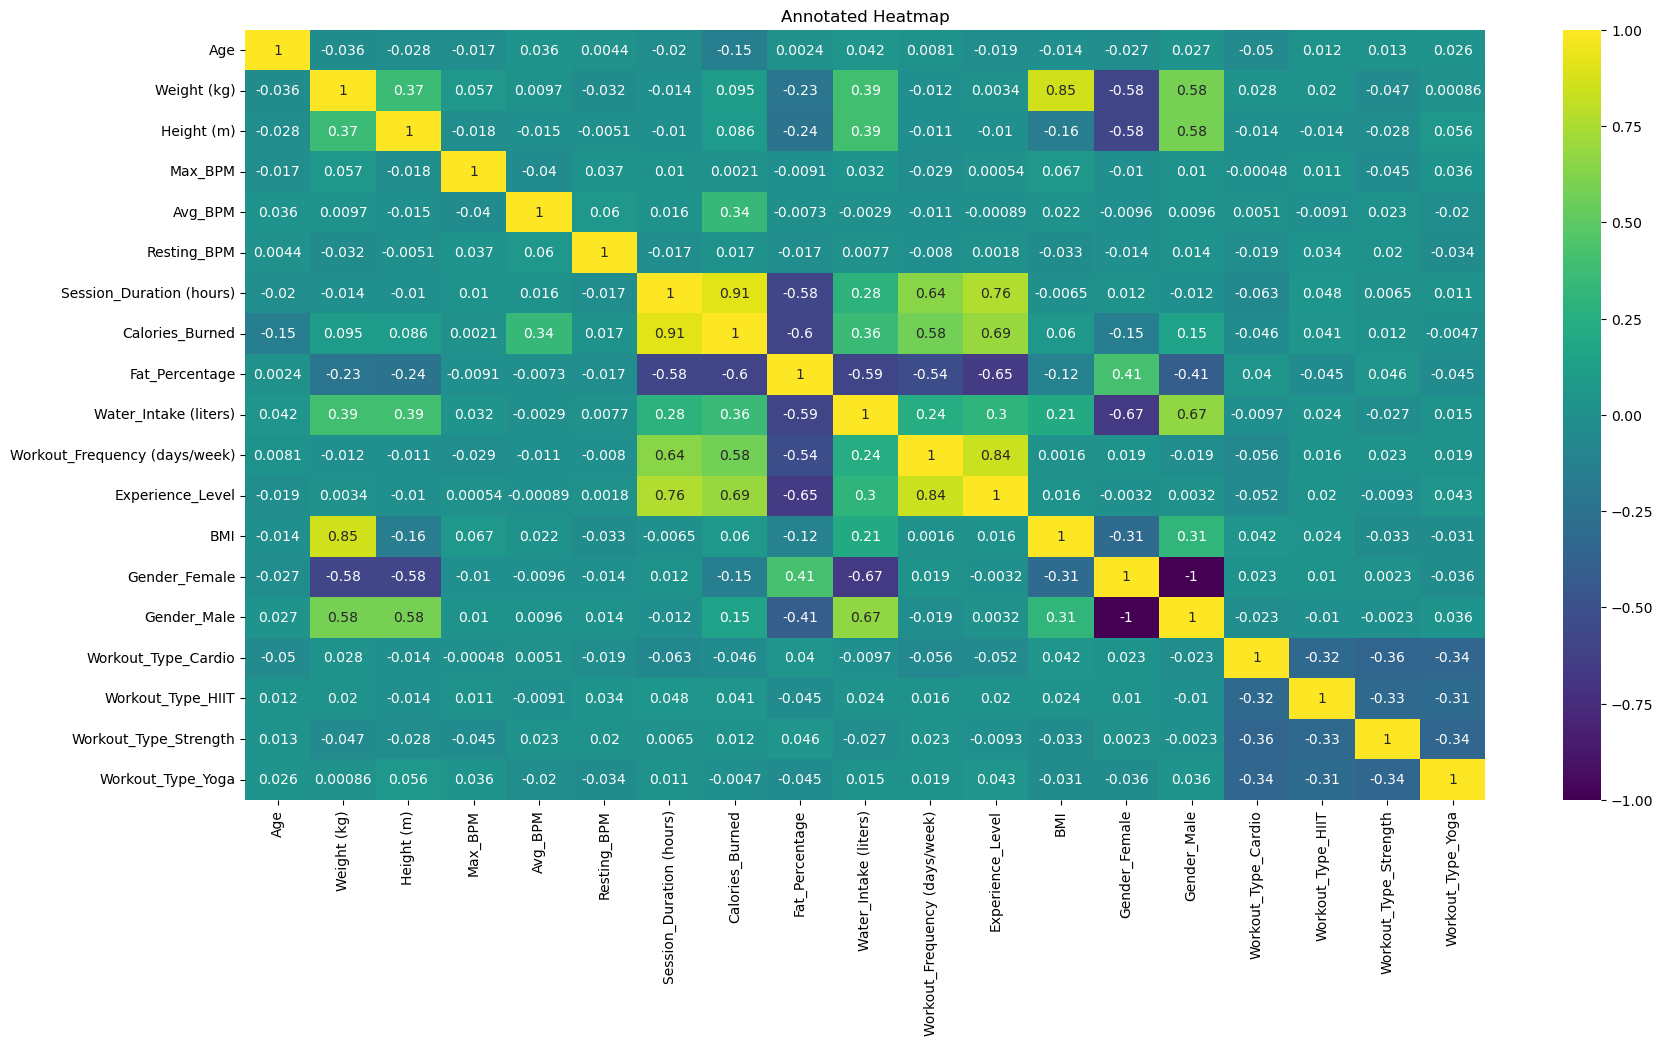

In [168]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_corr.corr(), annot=True ,annot_kws=dict(size=10),cmap='viridis')
plt.title('Annotated Heatmap')
plt.show()


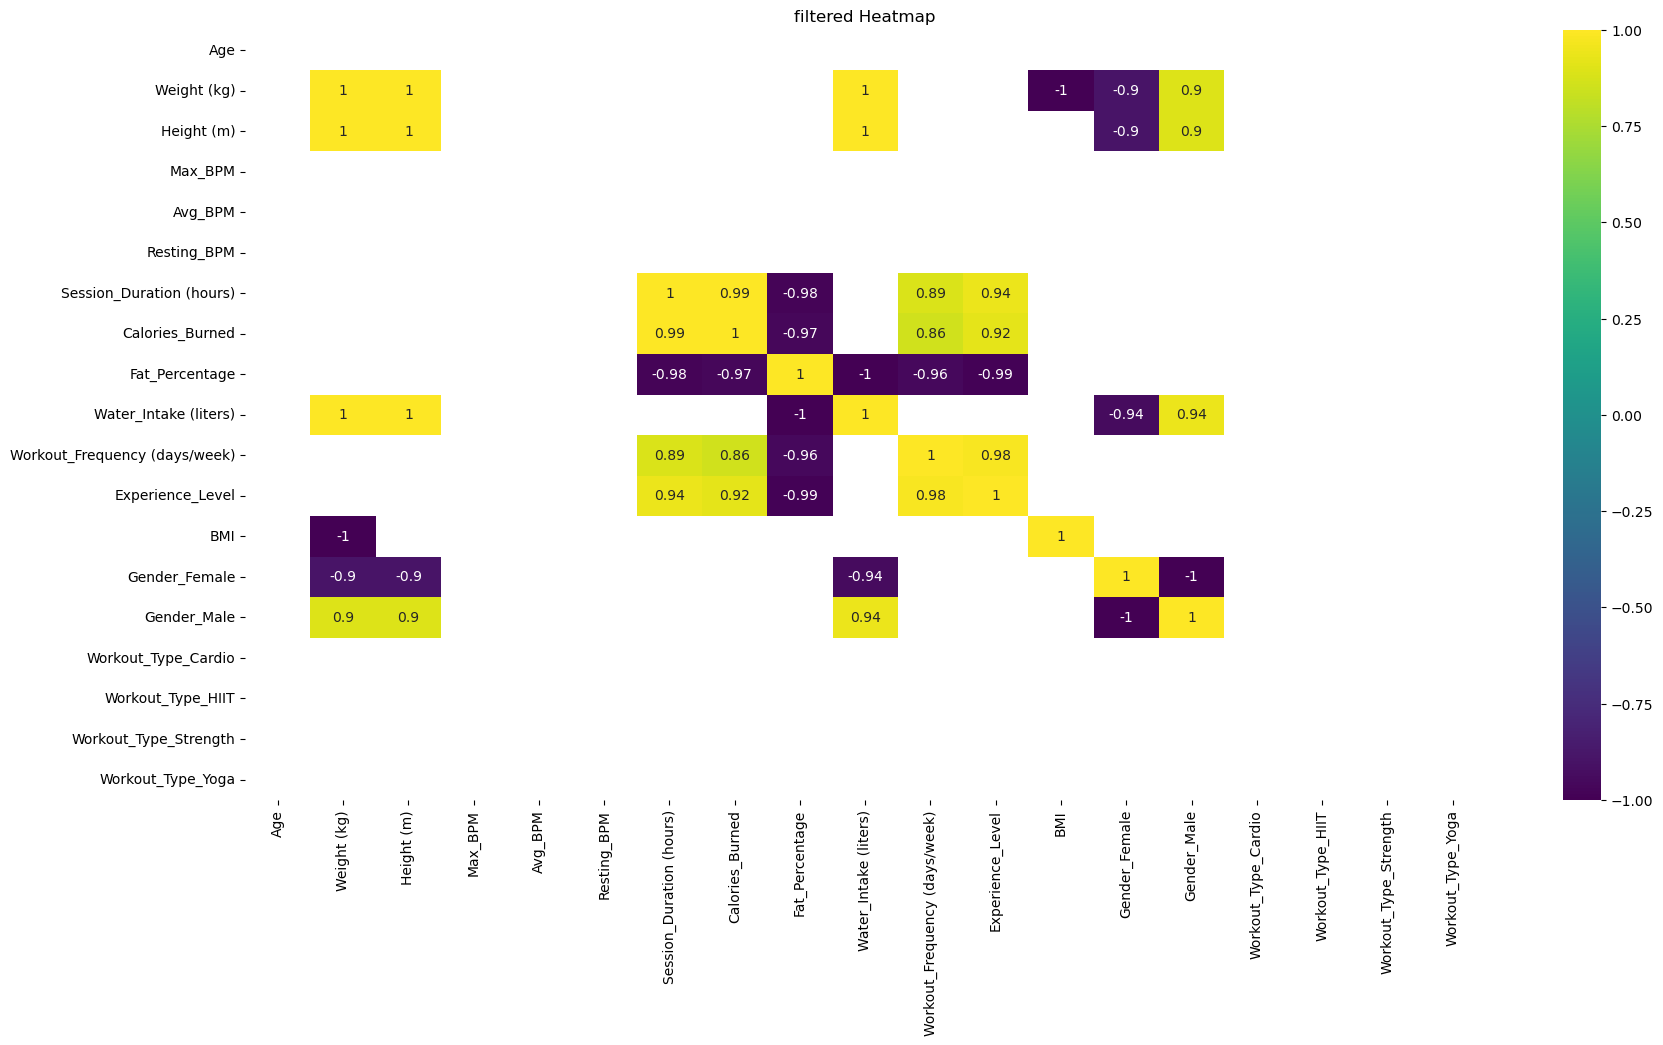

In [169]:
plt.figure(figsize=(20, 10))
sns.heatmap(filter_corr.corr(), annot=True ,annot_kws=dict(size=10),cmap='viridis')

plt.title('filtered Heatmap')

plt.show()


In [170]:
y=df_encoded["Calories_Burned"]
new_df=df_encoded.drop(columns=["Calories_Burned"])
scaler=StandardScaler()
x=scaler.fit_transform(new_df)

In [171]:
x

array([[ 1.42234256,  0.6814925 , -0.09854471, ..., -0.54210975,
        -0.60069889,  1.7524639 ],
       [ 0.60096485,  0.04931563, -1.50860357, ...,  1.84464493,
        -0.60069889, -0.57062517],
       [-0.54896396, -0.27149054, -0.49022773, ..., -0.54210975,
        -0.60069889, -0.57062517],
       ...,
       [ 1.66875588, -0.63475635,  0.29313831, ..., -0.54210975,
        -0.60069889, -0.57062517],
       [-0.54896396,  2.47895061,  0.84149453, ...,  1.84464493,
        -0.60069889, -0.57062517],
       [ 0.60096485,  0.70036345, -0.72523754, ..., -0.54210975,
         1.66472755, -0.57062517]])

In [172]:
x_train,x_test,y_train,y_test=train_test_split(x,y , test_size=0.1, random_state=21)

In [173]:
regression_models = {
    "Multi-Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(criterion="squared_error",random_state=21),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=21),
    "K-Nearest Neighbors (KNN)": KNeighborsRegressor(),
    "Ridge": Ridge(),
    "Lasso": Lasso()
}

results = {}
for name, model in regression_models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    results[name] = r2

for model_name, r2 in results.items():
    print(f"{model_name}: r2 score = {r2}")

Multi-Linear Regression: r2 score = 0.9774751127856913
Decision Tree: r2 score = 0.9505156509624236
Random Forest: r2 score = 0.9815339644251153
K-Nearest Neighbors (KNN): r2 score = 0.6997718580451191
Ridge: r2 score = 0.9774836677177171
Lasso: r2 score = 0.978500063173732


In [174]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [175]:
print(f"model score = {lr.score(x_test,y_test)}")
print(f"MSE = {mean_squared_error(y_test,y_pred)}")
print(f"MAE = {mean_absolute_error(y_test,y_pred)}")
print(f"R2 = {r2_score(y_test,y_pred)}")
print(f"RMSE = {root_mean_squared_error(y_test,y_pred)}")

model score = 0.9774751127856913
MSE = 1435.3462580472349
MAE = 29.106209215351566
R2 = 0.9774751127856913
RMSE = 37.885963865886204


In [176]:
dt=DecisionTreeRegressor(criterion="squared_error",random_state=21)
dt.fit(x_train,y_train)
y_pred2=dt.predict(x_test)

In [177]:
print(f"model score = {dt.score(x_test,y_test)}")
print(f"MSE = {mean_squared_error(y_test,y_pred2)}")
print(f"MAE = {mean_absolute_error(y_test,y_pred2)}")
print(f"R2 = {r2_score(y_test,y_pred2)}")
print(f"RMSE = {root_mean_squared_error(y_test,y_pred2)}")

model score = 0.9505156509624236
MSE = 3153.2755102040815
MAE = 43.316326530612244
R2 = 0.9505156509624236
RMSE = 56.15403378390622


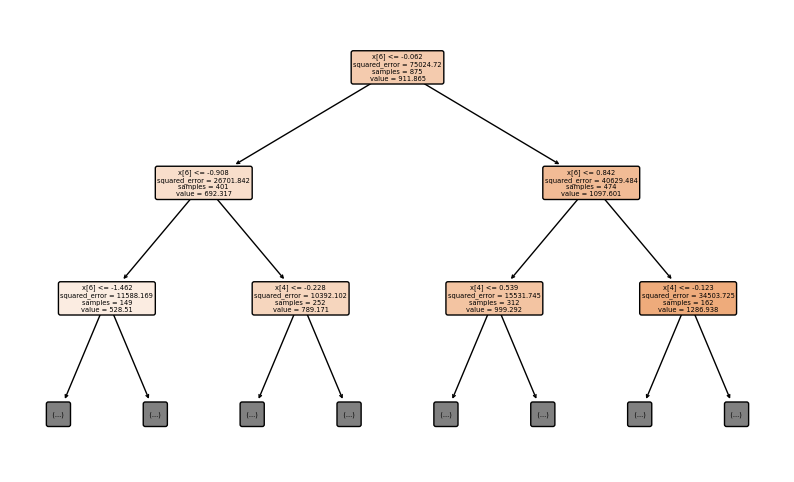

In [178]:
plt.figure(figsize=(10, 6))
plot_tree(dt, filled=True, rounded=True,max_depth=2)
plt.show()

In [179]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred3=knn.predict(x_test)

In [180]:
print(f"model score = {knn.score(x_test,y_test)}")
print(f"MSE = {mean_squared_error(y_test,y_pred3)}")
print(f"MAE = {mean_absolute_error(y_test,y_pred3)}")
print(f"R2 = {r2_score(y_test,y_pred3)}")
print(f"RMSE = {root_mean_squared_error(y_test,y_pred3)}")

model score = 0.6997718580451191
MSE = 19131.34285714286
MAE = 106.15510204081633
R2 = 0.6997718580451191
RMSE = 138.31609760668806


In [181]:
rf=RandomForestRegressor(n_estimators=100,random_state=21)
rf.fit(x_train,y_train)
y_pred4=rf.predict(x_test)

In [182]:
print(f"model score = {rf.score(x_test,y_test)}")
print(f"MSE = {mean_squared_error(y_test,y_pred4)}")
print(f"MAE = {mean_absolute_error(y_test,y_pred4)}")
print(f"R2 = {r2_score(y_test,y_pred4)}")
print(f"RMSE = {root_mean_squared_error(y_test,y_pred4)}")

model score = 0.9815339644251153
MSE = 1176.7053397959185
MAE = 27.00642857142857
R2 = 0.9815339644251153
RMSE = 34.30313892045331


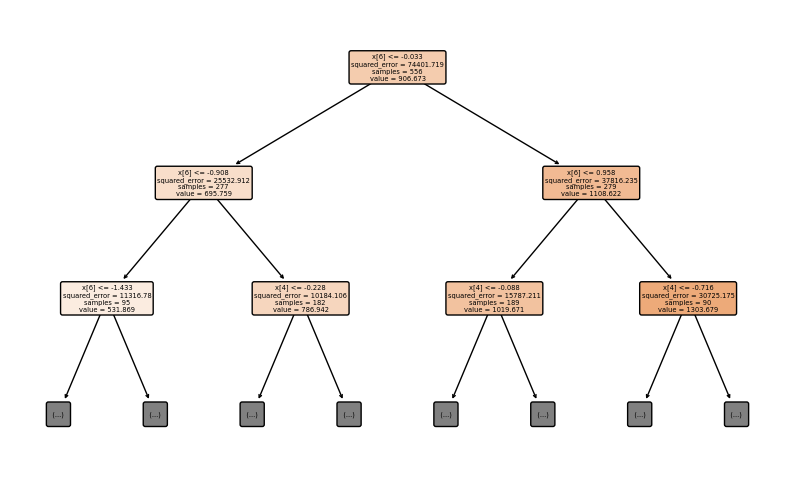

In [183]:
plt.figure(figsize=(10, 6))
plot_tree(rf[3], filled=True, rounded=True,max_depth=2)
plt.show()

In [184]:
ridge=Ridge()
ridge.fit(x_train,y_train)
y_pred5=ridge.predict(x_test)

In [185]:
print(f"model score = {ridge.score(x_test,y_test)}")
print(f"MSE = {mean_squared_error(y_test,y_pred5)}")
print(f"MAE = {mean_absolute_error(y_test,y_pred5)}")
print(f"R2 = {r2_score(y_test,y_pred5)}")
print(f"RMSE = {root_mean_squared_error(y_test,y_pred5)}")

model score = 0.9774836677177171
MSE = 1434.8011148216908
MAE = 29.167878993469152
R2 = 0.9774836677177171
RMSE = 37.87876865503538


In [186]:
lasso=Lasso()
lasso.fit(x_train,y_train)
y_pred6=lasso.predict(x_test)

In [187]:
print(f"model score = {lasso.score(x_test,y_test)}")
print(f"MSE = {mean_squared_error(y_test,y_pred6)}")
print(f"MAE = {mean_absolute_error(y_test,y_pred6)}")
print(f"R2 = {r2_score(y_test,y_pred6)}")
print(f"RMSE = {root_mean_squared_error(y_test,y_pred6)}")

model score = 0.978500063173732
MSE = 1370.0336689025642
MAE = 28.88598241624945
R2 = 0.978500063173732
RMSE = 37.01396586293563


In [188]:
def burned_calories():
        l=[]    
        l.append(int(input("what's your age" )))
        x=float(input("what's your weight (in KG)" ))
        y=float(input("what's your height (in meters)"))       
        l.append(x)    
        l.append(y)    
        l.append(int(input("what's your Max_BPM " )))    
        l.append(int(input("what's your Avg_BPM " )))   
        l.append(int(input("what's your Resting_BPM " )))    
        l.append(float(input("what's your Session_Duration (hours) " )))    
        l.append(float(input("what's your Fat_Percentage " )))    
        l.append(float(input("what's your Water_Intake (liters) " )))    
        l.append(int(input("what 's your Workout_Frequency (days/week) " )))    
        l.append(int(input("what 's your Experience_Level (from 1 to 3 ) " )))   
        l.append( x / (y** 2) )
        l.append(bool(int(input("Are you male? (1 for Yes, 0 for No): "))))
        l.append(bool(int(input("Are you female? (1 for Yes, 0 for No): "))))
        l.append(bool(int(input("Are you a cardio player? (1 for Yes, 0 for No): "))))
        l.append(bool(int(input("Are you a HIIT player? (1 for Yes, 0 for No): "))))
        l.append(bool(int(input("Are you a Strength player? (1 for Yes, 0 for No): "))))
        l.append(bool(int(input("Are you a Yoga player? (1 for Yes, 0 for No): "))))
        a=np.array(l).reshape(1, -1)
        scaler=StandardScaler()
        h=scaler.fit_transform(a)
        r=RandomForestRegressor(n_estimators=100, random_state=21)
        r.fit(x_train,y_train)
        print(f"your burned calories is = {r.predict(h)[0]}")
         
                 
                 
            

In [150]:
burned_calories()

what's your age 21
what's your weight (in KG) 83
what's your height (in meters) 1.8
what's your Max_BPM  183
what's your Avg_BPM  168
what's your Resting_BPM  78
what's your Session_Duration (hours)  1.5
what's your Fat_Percentage  12.3
what's your Water_Intake (liters)  2.7
what 's your Workout_Frequency (days/week)  5
what 's your Experience_Level (from 1 to 3 )  3
Are you male? (1 for Yes, 0 for No):  1
Are you female? (1 for Yes, 0 for No):  0
Are you a cardio player? (1 for Yes, 0 for No):  0
Are you a HIIT player? (1 for Yes, 0 for No):  1
Are you a Strength player? (1 for Yes, 0 for No):  0
Are you a Yoga player? (1 for Yes, 0 for No):  0


your burned calories is = 993.82
